# PCA algorithm example on iris dataset

## Libs imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D

## import Dataset

In [2]:
df = pd.read_csv('iris_dataset.txt', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
                                                        'type'])

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Replace values of "type" column to colors for visualization reasons

In [4]:
df['type']=df.type.map({'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'})

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,red
1,4.9,3.0,1.4,0.2,red
2,4.7,3.2,1.3,0.2,red
3,4.6,3.1,1.5,0.2,red
4,5.0,3.6,1.4,0.2,red


In [6]:
df_target=df['type']
df_target.head()

0    red
1    red
2    red
3    red
4    red
Name: type, dtype: object

In [7]:
df.drop(['type'], axis=1, inplace=True)

In [8]:
df.shape

(150, 4)

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 'Manual' PCA

## Data Normalization

In [10]:
df_std = StandardScaler().fit_transform(df)

## Transpose

In [11]:
df_std_trans = df_std.T

## Find the covariance matrix, since we deal with 4 columns dataset the matrix will be an [4x4] 

In [12]:
df_std_trans_cov = np.cov(df_std_trans)

In [13]:
df_std_trans_cov

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

## Find the eigenvalues, eigenvector.

In [14]:
eig_val, eig_vec = np.linalg.eig(df_std_trans_cov)

In [15]:
eig_vec

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [16]:
eig_val

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

## Calculate the new dataset using only the first 2 PC

In [17]:
pro_x = df_std.dot(eig_vec.T[0])

In [18]:
pro_y = df_std.dot(-eig_vec.T[1])

In [19]:
result = pd.DataFrame({'pc_1': pro_x.T, 'pc_2':pro_y.T}, columns=['pc_1', 'pc_2'])

In [20]:
result.head(10)

,pc_1,pc_2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
5,-2.070537,1.518549
6,-2.445711,0.074563
7,-2.233842,0.247614
8,-2.341958,-1.095146
9,-2.188676,-0.448629


## Visualize the dataset

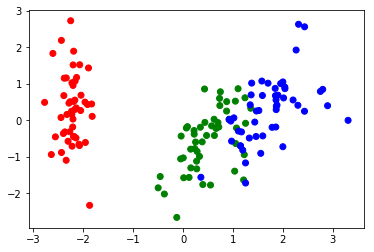

In [21]:
plt.scatter(x=result.pc_1, y=result.pc_2, c=df_target);

## Using 3 PC and visualizing data

In [22]:
pro_z = df_std.dot(eig_vec.T[2])

In [23]:
result_3d = pd.DataFrame({'pc_1': pro_x.T, 'pc_2':pro_y.T, 'pc_3': pro_z.T}, columns=['pc_1', 'pc_2', 'pc_3'])

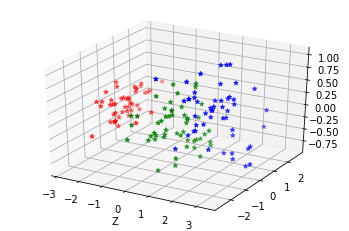

In [24]:
fig = plt.figure();
ax = fig.add_subplot(111, projection='3d');
ax.scatter(result_3d.pc_1, result_3d.pc_2, result_3d.pc_3, c=df_target, marker='*')
ax.set_xlabel('X');
ax.set_xlabel('Y');
ax.set_xlabel('Z');
plt.show()

# PCA implementation with sklearn  

In [25]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Define PCA

In [26]:
pca = PCA(n_components=2)
#pca = PCA(.95) If needed we can define an percentage instead of PC components

## Data Normalization

In [27]:
scaled_df = StandardScaler().fit_transform(df)

## Fit PCA

In [28]:
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
princ_comp = pca.transform(scaled_df)

In [30]:
np.set_printoptions(suppress=True)

In [31]:
princ_comp

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ],
       [-2.07053681,  1.51854856],
       [-2.44571134,  0.07456268],
       [-2.23384186,  0.24761393],
       [-2.34195768, -1.09514636],
       [-2.18867576, -0.44862905],
       [-2.16348656,  1.07059558],
       [-2.32737775,  0.15858745],
       [-2.22408272, -0.70911816],
       [-2.63971626, -0.93828198],
       [-2.19229151,  1.88997851],
       [-2.25146521,  2.72237108],
       [-2.20275048,  1.51375028],
       [-2.19017916,  0.51430431],
       [-1.89407429,  1.43111071],
       [-2.33994907,  1.15803343],
       [-1.91455639,  0.43046516],
       [-2.2046454 ,  0.95245732],
       [-2.77416979,  0.48951703],
       [-1.82041156,  0.10675079],
       [-2.2282175 ,  0.16218616],
       [-1.95702401, -0.60789257],
       [-2.05206331,  0.26601431],
       [-2.16819365,  0.5520165 ],
       [-2.14030596,

In [32]:
dff = pd.DataFrame(princ_comp, columns=['pc_1', 'pc_2'])

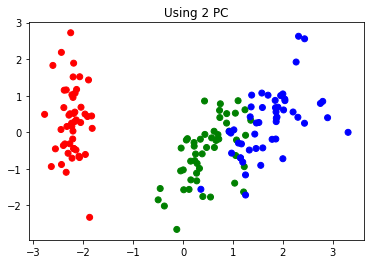

In [33]:
plt.scatter(x=dff.pc_1, y=dff.pc_2, c=df_target);
plt.title('Using 2 PC');

In [34]:
pca.get_covariance()

array([[ 0.9779242 , -0.10104477,  0.87069468,  0.86134879],
       [-0.10104477,  1.00395722, -0.41916911, -0.37286994],
       [ 0.87069468, -0.41916911,  1.04639367,  0.93676197],
       [ 0.86134879, -0.37286994,  0.93676197,  0.99857055]])

In [35]:
pca.get_precision()

array([[ 7.20353574, -2.12418013, -3.57219978, -3.65572451],
       [-2.12418013,  1.82253795,  1.54848326,  1.06018486],
       [-3.57219978,  1.54848326,  7.94244356, -3.79130572],
       [-3.65572451,  1.06018486, -3.79130572,  8.10730497]])

## Percentage of each PC

In [36]:
pc_var = pca.explained_variance_ratio_

In [37]:
labels = ['pc_' + str(x) for x in range(1, len(pc_var)+1)]

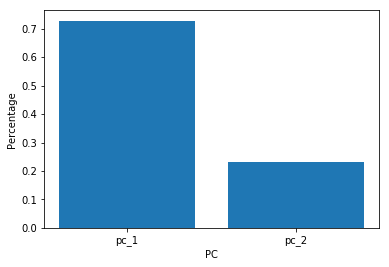

In [38]:
plt.bar(x=range(1,len(pc_var)+1), height=pc_var, tick_label=labels)
plt.ylabel('Percentage')
plt.xlabel('PC')
plt.title('');
plt.show()

In [39]:
sum(pc_var)
# total amount

0.9580097536148199